# Tensorflow with J_list (tracking only test loss)

In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import tensorflow as tf

## Data Preparation

In [2]:
model = lambda x: x * 2.0 + 1.0
x_train = np.array([0, 1]).reshape(-1,1)
y_train = model(x_train)
x_test = np.array([2,3,4]).reshape(-1,1)
y_test = model(x_test)

## Function Definitinos

In [3]:
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD()
# train_loss = tf.keras.metrics.Mean(name='train_loss')
test_loss = tf.keras.metrics.Mean(name='test_loss')

2022-01-25 22:32:16.316164: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-25 22:32:16.318452: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-25 22:32:16.332696: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


## Training and Testing

In [4]:
def train_step(x_train, y_train):
    with tf.GradientTape() as tape:
        pred = wb(x_train)
        loss = loss_fn(y_train, pred)
    delta_wb = tape.gradient(loss, wb.trainable_variables)
    optimizer.apply_gradients(zip(delta_wb, wb.trainable_variables))
    # train_loss(loss)

In [5]:
## NoteX
def testcode_for_optimizer():
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, momentum=0.0)
    W = [tf.Variable([[1.]])]
    dw = [tf.constant([[0.1]])]
    optimizer.apply_gradients(zip(dw,W))
    return dw, W
testcode_for_optimizer()

([<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.1]], dtype=float32)>],
 [<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.99683774]], dtype=float32)>])

In [6]:
def test_step(x_test, y_test):
    pred = wb(x_test)
    loss = loss_fn(y_test, pred)
    test_loss(loss)

In [7]:
def train(N_epoch=1000, train_step=train_step, test_step=test_step):
    J_dict = {"train_loss":np.zeros(N_epoch), 
              "test_loss":np.zeros(N_epoch)}
    #train_loss.reset_states() 
    test_loss.reset_states()    
    for e in range(N_epoch):
        train_step(x_train, y_train)    
        test_step(x_test, y_test)
        #J_dict["train_loss"][e] = train_loss.result().numpy()
        J_dict["test_loss"][e] = test_loss.result().numpy()
    return J_dict

In [8]:
train_step_tf = tf.function(train_step)
test_step_tf = tf.function(test_step)

In [9]:
wb = tf.keras.models.Sequential()
wb.add(tf.keras.layers.Dense(1,input_shape=(1,)))

J_dict = train(train_step=train_step_tf, test_step=test_step_tf)        
w_tr, b_tr = wb.get_weights()
print(f"w={w_tr[0,0]:.3}, b={b_tr[0]:.3}")

2022-01-25 22:32:16.701367: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-01-25 22:32:16.706794: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3599995000 Hz


w=1.99, b=1.01


Text(0, 0.5, 'J')

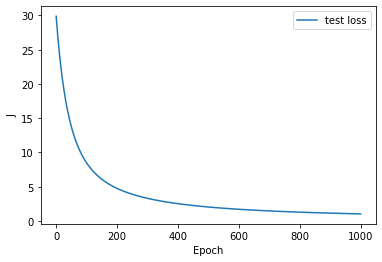

In [10]:
#plt.plot(J_dict["train_loss"], label="train loss")
plt.plot(J_dict["test_loss"], label="test loss")
plt.legend(loc=0)
plt.xlabel("Epoch")
plt.ylabel("J")

In [11]:
%time J_dict = train(N_epoch=100, train_step=train_step)
%time J_dict = train(N_epoch=100, train_step=train_step_tf, \
                     test_step=test_step_tf)
%time J_dict = train(N_epoch=1000, train_step=train_step)
%time J_dict = train(N_epoch=1000, train_step=train_step_tf, \
                     test_step=test_step_tf)

CPU times: user 1.56 s, sys: 939 ms, total: 2.5 s
Wall time: 637 ms
CPU times: user 2.81 s, sys: 3.7 s, total: 6.52 s
Wall time: 817 ms
CPU times: user 17.8 s, sys: 9.82 s, total: 27.6 s
Wall time: 6.72 s
CPU times: user 13 s, sys: 17.8 s, total: 30.8 s
Wall time: 4.1 s


In [12]:
18.8/9.24

2.034632034632035

In [13]:
9.24 * 1000 / 19

486.3157894736842